In [1]:
import numpy as np
import pandas as pd
import sys
sys.path.append("../")
import matplotlib.pyplot as plt
import PT_Thermobar_V1 as pw
import sympy as sym
pd.options.display.max_columns = None

In [2]:
out_Cpx=pw.import_Excel('Lassen.xlsx', sheet_name="Hollyday_Cpx")
my_input_Cpx=out_Cpx['my_input']
myCpxs=out_Cpx['Cpxs']

out_Liq_H=pw.import_Excel('Lassen.xlsx', sheet_name="Hollyday_WR")
my_input_Liq_H=out_Liq_H['my_input']
myLiqs_H=out_Liq_H['Liqs']

out_Liq_C=pw.import_Excel('Lassen.xlsx', sheet_name="Clynne_WR")
my_input_Liq_C=out_Liq_C['my_input']
myLiqs_C=out_Liq_C['Liqs']

out_Liq_W=pw.import_Excel('Lassen.xlsx', sheet_name="Walowski_Primitive")
my_input_Liq_W=out_Liq_W['my_input']
myLiqs_W=out_Liq_W['Liqs']

C:\Users\penny\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Only Fe2O3_Liq found in input, the code has allocated this to FeOt_Ol, and set Fe3FeT_Liq=0, e.g., assuming this is XRF data. If there really is some Fe3+, set Fe3Fet_Liq=value.
We have set Fe3Fet_Liq to zero, as you only entered FeOt. You can input a Fe3FeT_Liq column to specify this value instead
We have set Fe3Fet_Liq to zero, as you only entered FeOt. You can input a Fe3FeT_Liq column to specify this value instead


In [4]:
Matches_C=pw.calculate_Cpx_Liq_PT_melt_matching(Liq_Comps=myLiqs_C, Cpx_Comps=myCpxs, equationP="P_Neave2017", equationT="T_Put2008_eq33", sigma=100, Fe3FeT_Liq=0.2, KdErr=100, 
                                             Return_All_Matches=True)

Considering 11240 Liq-Cpx pairs, be patient if this is >>1 million!


In [5]:
Matches_W=pw.calculate_Cpx_Liq_PT_melt_matching(Liq_Comps=myLiqs_W, Cpx_Comps=myCpxs, equationP="P_Neave2017", equationT="T_Put2008_eq33", sigma=100, Fe3FeT_Liq=0.2, KdErr=100, 
                                             Return_All_Matches=True)

Considering 40 Liq-Cpx pairs, be patient if this is >>1 million!


C:\Users\penny\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [6]:
Kd=pw.calculate_Clinopyroxene_Rhodes_Diagram_Lines(Min_Mgno=.50, Max_Mgno=.80,  simple=True)

C:\Users\penny\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
Kd

,Mg#_Liq,Eq_Cpx_Mg# (Kd=0.28),Eq_Cpx_Mg# (Kd=0.2),Eq_Cpx_Mg# (Kd=0.36)
0,0.500000,0.781250,0.833333,0.735294
1,0.503030,0.783314,0.835010,0.737647
2,0.506061,0.785365,0.836673,0.739986
3,0.509091,0.787402,0.838323,0.742312
4,0.512121,0.789425,0.839960,0.744625
...,...,...,...,...
95,0.787879,0.929900,0.948905,0.911641
96,0.790909,0.931079,0.949782,0.913098
97,0.793939,0.932252,0.950653,0.914549
98,0.796970,0.933419,0.951520,0.915993


C:\Users\penny\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


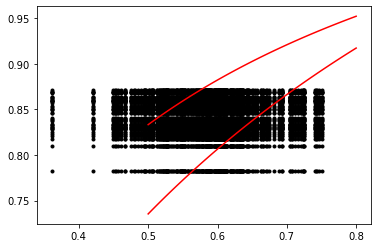

In [12]:
plt.plot(Matches_C['Mg_Number_Liq_Fe3'], Matches_C['Mgno_CPX'], '.k')
plt.plot(Kd['Mg#_Liq'], Kd['Eq_Cpx_Mg# (Kd=0.36)'], '-r')
plt.plot(Kd['Mg#_Liq'], Kd['Eq_Cpx_Mg# (Kd=0.2)'], '-r')


C:\Users\penny\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


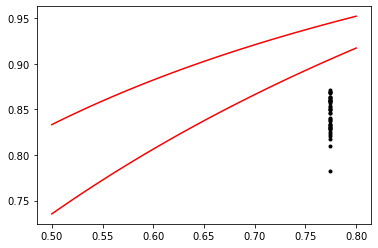

In [13]:
plt.plot(Matches_W['Mg_Number_Liq_Fe3'], Matches_W['Mgno_CPX'], '.k')
plt.plot(Kd['Mg#_Liq'], Kd['Eq_Cpx_Mg# (Kd=0.36)'], '-r')
plt.plot(Kd['Mg#_Liq'], Kd['Eq_Cpx_Mg# (Kd=0.2)'], '-r')



In [36]:
PT=pw.calculate_Cpx_Liq_PT_melt_matching(Liq_Comps=myLiqs_C, Cpx_Comps=myCpxs, equationP="P_Neave2017", equationT="T_Put2008_eq33", H2O_Liq=3)

Considering 11240 Liq-Cpx pairs, be patient if this is >>1 million!
4683 Matches remaining after initial Kd filter. Now moving onto iterative calculations


..\PT_Thermobar_V1.py:5199: UserWarning: Some inputted liquids have SiO2>68wt%, which exceeds the upper calibration range of the Neave and Putirka (2017) model.
  P_func=calculate_Cpx_Liq_Press(MeltMatch=MeltMatch, equationP=equationP, Eq_Tests=False)


Done!


In [59]:
PT=pw.calculate_Cpx_Liq_PT_melt_matching(Liq_Comps=myLiqs_W, Cpx_Comps=myCpxs, equationP="P_Neave2017", equationT="T_Put2008_eq33", H2O_Liq=3, KdErr=1, sigma=10)

C:\Users\penny\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Considering 40 Liq-Cpx pairs, be patient if this is >>1 million!
40 Matches remaining after initial Kd filter. Now moving onto iterative calculations
Done!


C:\Users\penny\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(array([2., 2., 9., 6., 4., 7., 7., 1., 0., 1.]),
 array([-0.93494899, -0.56213329, -0.18931759,  0.18349811,  0.55631381,
         0.92912952,  1.30194522,  1.67476092,  2.04757662,  2.42039232,
         2.79320803]),
 <BarContainer object of 10 artists>)

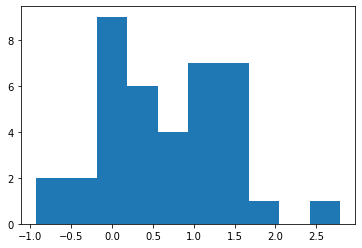

In [37]:
Avs=PT['Averaged_PTs']
All=PT['All_PTs']
plt.hist(Avs['Mean_P_kbar_calc'])

(array([ 33., 165., 463., 552., 569., 388., 214., 103.,  49.,  18.]),
 array([-1.60161465, -1.0548735 , -0.50813236,  0.03860879,  0.58534994,
         1.13209109,  1.67883224,  2.22557339,  2.77231454,  3.31905569,
         3.86579683]),
 <BarContainer object of 10 artists>)

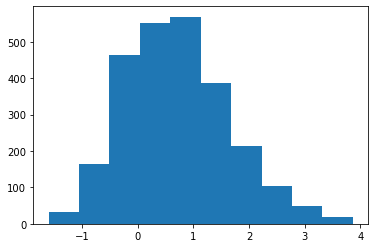

In [38]:
plt.hist(All['P_kbar_calc'])

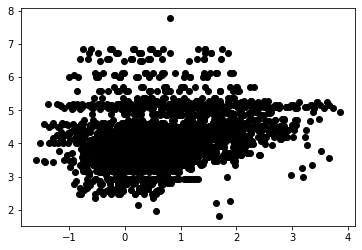

In [39]:
plt.plot(All['P_kbar_calc'], All['MgO_Liq'],'ok')

In [40]:
PT=pw.calculate_Cpx_Liq_PT_melt_matching(Liq_Comps=myLiqs_C, Cpx_Comps=myCpxs, equationP="P_Wieser2021_H2O_indep", equationT="T_Put2008_eq33", H2O_Liq=3)

C:\Users\penny\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Considering 11240 Liq-Cpx pairs, be patient if this is >>1 million!
4683 Matches remaining after initial Kd filter. Now moving onto iterative calculations
Done!


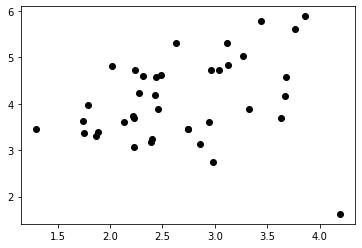

In [45]:
All=PT['All_PTs']
Av=PT['Averaged_PTs']
plt.plot(Av['Mean_P_kbar_calc'], Av['Mean_MgO_Liq'],'ok')